# Visualizing Earnings Based On College Majors

In this project, I will be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012.

### The Dataset

The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. The cleaned dataset can be found [here](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. The columns in the dataset are defined follows:

    Rank - Rank by median earnings (the dataset is ordered by this column).
    Major_code - Major code.
    Major - Major description.
    Major_category - Category of major.
    Total - Total number of people with major.
    Sample_size - Sample size (unweighted) of full-time.
    Men - Male graduates.
    Women - Female graduates.
    ShareWomen - Women as share of total.
    Employed - Number employed.
    Median - Median salary of full-time, year-round workers.
    Low_wage_jobs - Number in low-wage service jobs.
    Full_time - Number employed 35 hours or more.
    Part_time - Number employed less than 35 hours.
    Full_time_year_round - Employed at least 50 weeks (WKW == 1) and at least 35 hours (WKHP >= 35)
    Unemployed - Number unemployed (ESR == 3)
    Unemployment_rate - Unemployed / (Unemployed + Employed)
    Median - Median earnings of full-time, year-round workers
    P25th - 25th percentile of earnings
    P75th - 75th percentile of earnings
    College_jobs - Number with job requiring a college degree
    Non_college_jobs - Number with job not requiring a college degree
    Low_wage_jobs - Number in low-wage service jobs



Import libraries and Reading the dataset into a Dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

recent_grads = pd.read_csv('recent-grads.csv')
print(recent_grads.iloc[0])


Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object


In [2]:
raw_data_count = recent_grads.shape[0]
print(raw_data_count)#shows number of rows before dropping null rows
recent_grads.head()


173


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [3]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [4]:
recent_grads = recent_grads.dropna()
cleaned_data_count = recent_grads.shape[0]#shows the remaining number of rows after dropping null rows
print(cleaned_data_count)

172


The statistical summary of all the numeric columns in the dataset is as follows:

In [5]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,87.377907,3895.953488,39370.081395,16723.406977,22646.674419,0.522223,357.941860,31355.80814,26165.767442,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,63483.491009,28122.433474,41057.330740,0.231205,619.680419,50777.42865,42957.122320,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.00000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,4549.750000,2177.500000,1778.250000,0.336026,42.000000,3734.75000,3181.000000,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,15104.000000,5434.000000,8386.500000,0.534024,131.000000,12031.50000,10073.500000,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,38909.750000,14631.000000,22553.750000,0.703299,339.000000,31701.25000,25447.250000,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.00000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


### Visualizing and exploring data using Scatter plots 

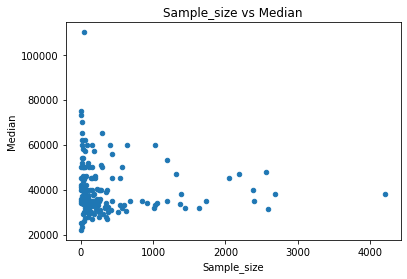

In [6]:
recent_grads.plot(x='Sample_size', y='Median', 
                  kind='scatter', 
                  title='Sample_size vs Median')

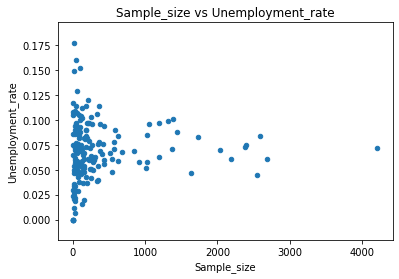

In [7]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', 
                  kind='scatter',
                 title='Sample_size vs Unemployment_rate')

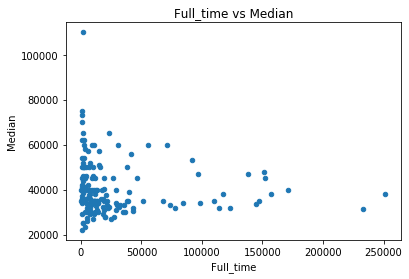

In [8]:
recent_grads.plot(x='Full_time', y='Median', 
                  kind='scatter',
                 title='Full_time vs Median')

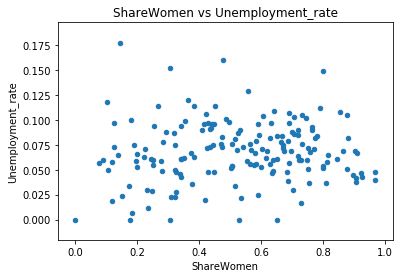

In [56]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', 
                  kind='scatter',
                 title='ShareWomen vs Unemployment_rate')

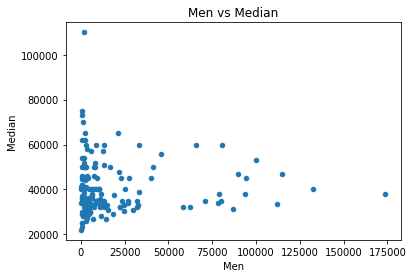

In [10]:
recent_grads.plot(x='Men', y='Median', 
                  kind='scatter',
                 title='Men vs Median')

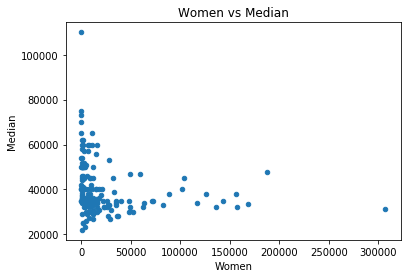

In [11]:
recent_grads.plot(x='Women', y='Median', 
                  kind='scatter',
                 title='Women vs Median')

From the above scatter plots, it is not possible to explore more or decide and come to a conclusion.

### Visualizing and exploring data using Histogram

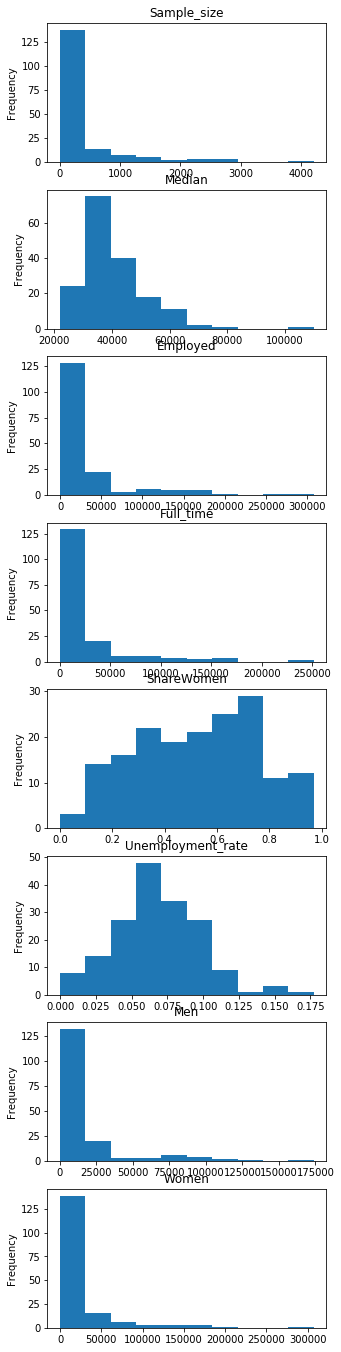

In [55]:
cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]

fig = plt.figure(figsize=(5,24))
for i in range(0,8):
    ax = fig.add_subplot(8,1,i+1)
    ax = recent_grads[cols[i]].plot(kind='hist', title=cols[i])

Plotted the Histograms in separate cells for the purpose of clarity

#### Distribution of Sample_size

Text(0.5, 0, 'Sample size')

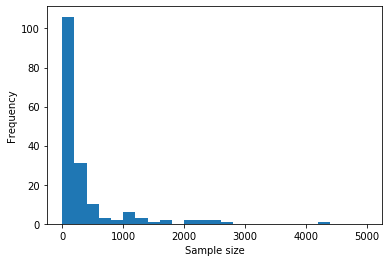

In [13]:
recent_grads['Sample_size'].plot(kind='hist', bins=25, range=(0,5000)).set_xlabel('Sample size')

#### Distribution of Median

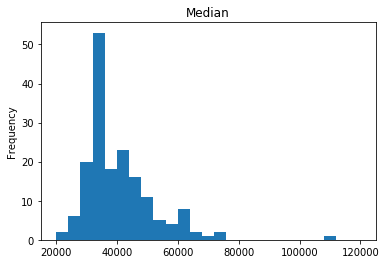

In [14]:
recent_grads['Median'].plot(kind='hist', bins = 25, range = (20000,120000), title = 'Median')

The most common median salary is between 30000 and 40000

#### Distribution of Employed

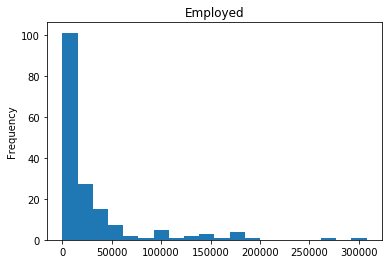

In [15]:
recent_grads['Employed'].plot(kind='hist', bins=20,  title='Employed')

#### Distribution of Full_time

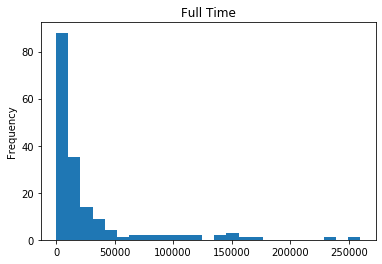

In [16]:
recent_grads['Full_time'].plot(kind='hist', bins=25, range=(0,260000), title='Full Time')

#### Distribution of ShareWomen

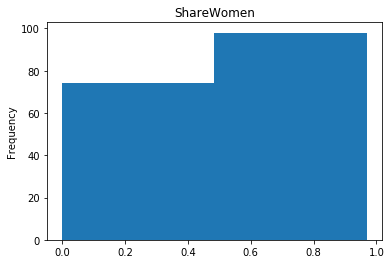

In [17]:
recent_grads['ShareWomen'].plot(kind='hist', bins=2, title='ShareWomen')

In [18]:
recent_grads['ShareWomen'].value_counts(bins=2).sort_index()

(-0.0019690000000000003, 0.484]    74
(0.484, 0.969]                     98
Name: ShareWomen, dtype: int64

From the histogram and the figures as seen above, more than 50% ie, 98 of the 172 majors have majority Women students.

#### Distribution of Unemployment_rate

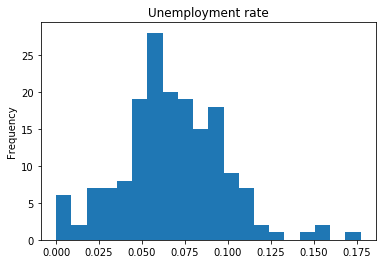

In [19]:
recent_grads['Unemployment_rate'].plot(kind='hist', bins=20,  title='Unemployment rate')

#### Distribution of Men

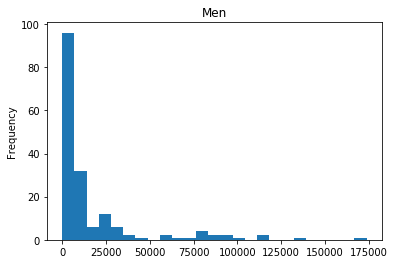

In [20]:
recent_grads['Men'].plot(kind='hist', bins=25, title='Men')

#### Distribution of Women

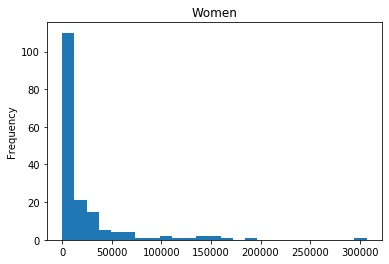

In [21]:
recent_grads['Women'].plot(kind='hist', bins=25, title='Women')

### Visualizing and exploring data using Scatter matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A150B00748>,
      dtype=object)

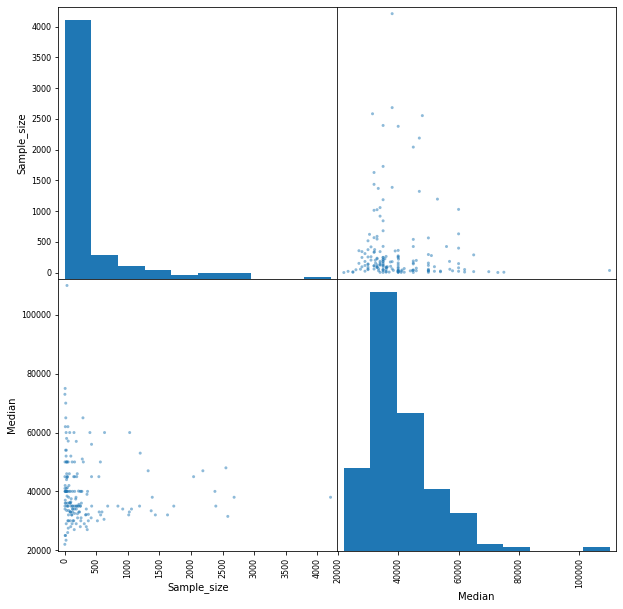

In [22]:
from pandas.plotting import scatter_matrix

scatter_matrix(recent_grads[['Sample_size','Median']], 
               figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A150C14B88>,
      dtype=object)

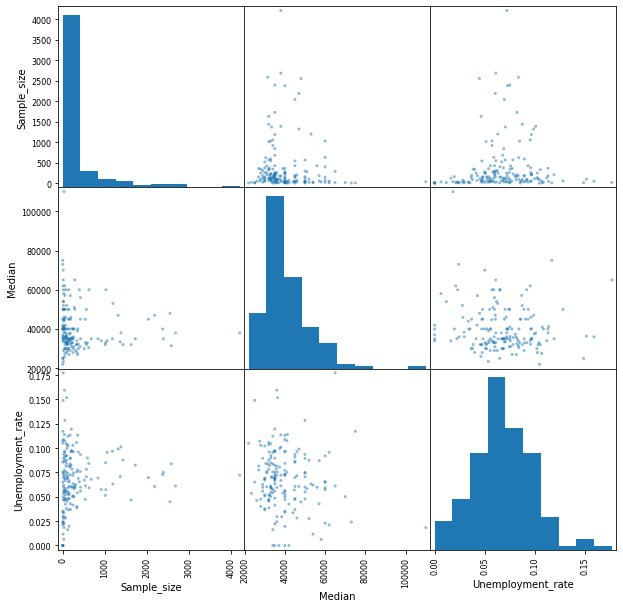

In [23]:
scatter_matrix(recent_grads[['Sample_size','Median','Unemployment_rate']], 
               figsize=(10,10))

### Visualising and exploring data  using Bar plots

Here, I'm going to use bar plots to compare the percentages of women (ShareWomen) from the first ten rows and last ten rows, and also compare the unemployment rate (Unemployment_rate) from the first ten rows and last ten rows of the recent_grads dataframe.


#### Major vs ShareWomen

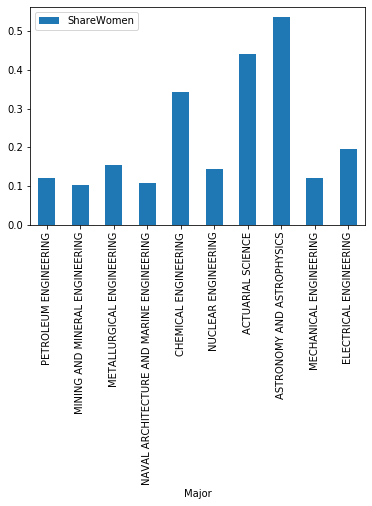

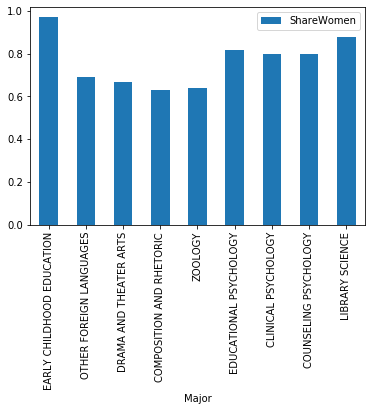

In [62]:
recent_grads[:10].plot.bar(x='Major',y='ShareWomen')
recent_grads[163:].plot.bar(x='Major',y='ShareWomen')

The above bar plots show that Astronomy and astrophysics, ECE, majors related to Psychology and Library Science have the majority share of women students.

#### Major vs Unemployment_rate

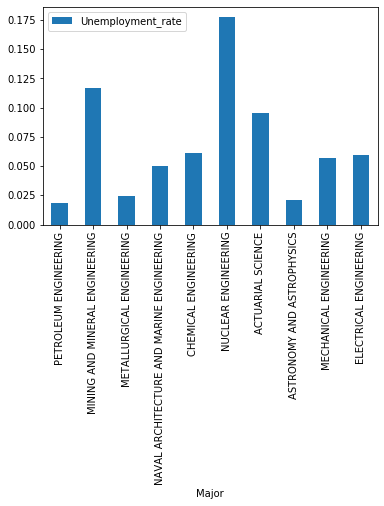

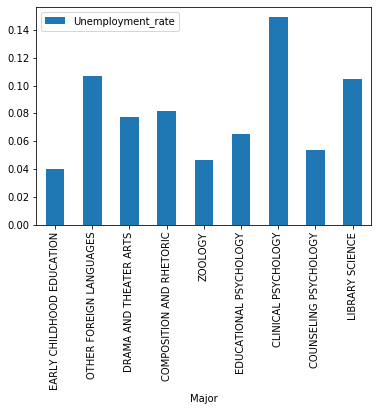

In [25]:
recent_grads[:10].plot.bar(x='Major',y='Unemployment_rate')
recent_grads[163:].plot.bar(x='Major',y='Unemployment_rate')

From the above charts, students who majored in Nuclear Engineering are mostly unemployed of all majors.

#### Major vs Median

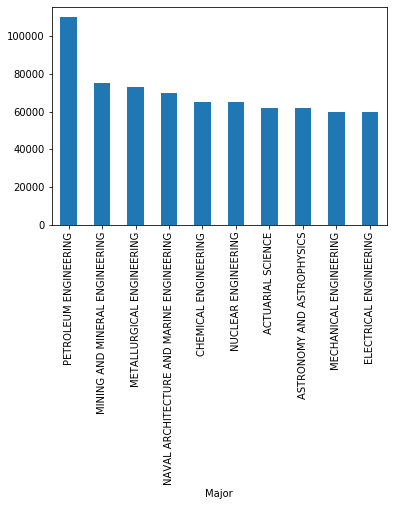

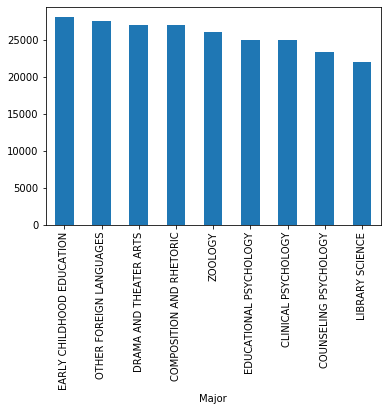

In [29]:
recent_grads[:10].plot.bar(x='Major', y='Median',legend=False)
recent_grads[163:].plot.bar(x='Major', y='Median',legend=False)

Students who majored in Petroleum Engineering were drawing the highest median salary and the least paid being the Library Science category

#### Comparing the number of men and women in each category

To compare the number of men and women in each category, I visualize the data using group bar plot.


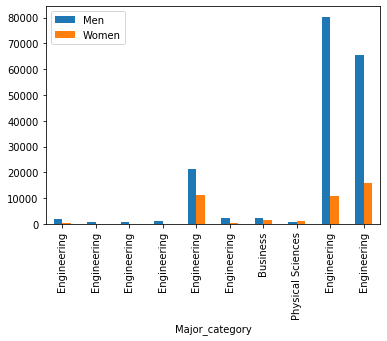

In [54]:
recent_grads[:10].plot.bar(x='Major_category',y=['Men','Women'])


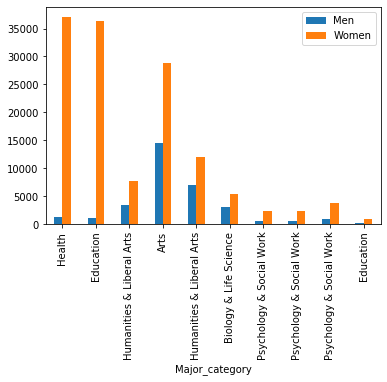

In [52]:
recent_grads[-10:].plot.bar(x='Major_category',y=['Men','Women'])

From the above plots, the bottom 10 records in the datset have more women students mainly in the Health, Education , Arts, Education, Humanities and Social Work majors. From the top 10 records, Mechanical and Electrical engineering have the most number of men students.

#### Median salaries and Unemployment rate.

Using a box plot to visualize the distributions of median salaries and unemployment rate


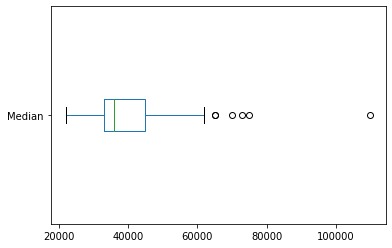

In [57]:
recent_grads['Median'].plot.box(vert=False)

As observed earlier, again the median of salary in the dataframe from the above is between 30000 and 40000. Majority of the employed students earned salary between 30000 and 40000.

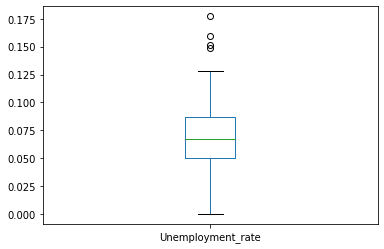

In [58]:
recent_grads['Unemployment_rate'].plot.box()

The unemployment rates of the graduates is between 0 and 12% as seen from the above plot.

### Conclusion

In this project, pandas plotting tools were used to explore data on job outcomes of recent graduates. Observations made from the above analysis are as follows: 

   * The graduates who were employed full-time earned an average salary between 30000 and 40000.
   * Majority of the women students enrolled in Health Sciences, Psychology and Social Work, Education and Humanities & Arts majors while men preferred Engineering majors.